In [1]:
import pandas as pd
import matplotlib.pyplot as mt
import numpy as np

In [13]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\police.csv")
df.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [16]:
df.drop(["county_name","search_type"],axis=1,inplace=True)

In [17]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [18]:
df.shape

(91741, 13)

In [19]:
df.isnull().sum().sum()

np.int64(48281)

In [20]:
df.dropna(how="any",inplace=True)

In [21]:
df.shape

(86113, 13)

In [22]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [289]:
soft=df["violation"]

In [290]:
soft=df["violation"].str.split("/",expand=True).stack()
soft=soft.to_frame()
soft.columns=["violation_1"]
violation_1=soft.groupby(["violation_1"]).size()
violation_1=violation_1
violation_1.sort_values(ascending=False)

violation_1
Speeding            48463
Moving violation    16224
Equipment           11020
Other                4317
Registration         3432
plates               3432
Seat belt            2952
dtype: int64

In [291]:
mt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [292]:
mt.style.use("default")

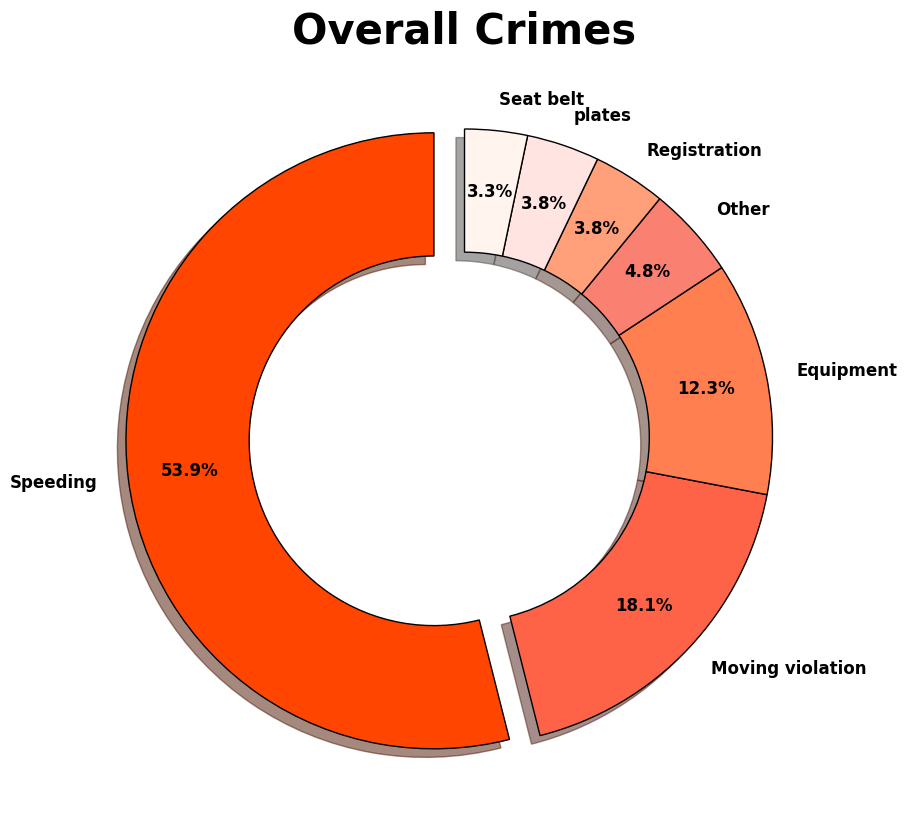

In [293]:
violet=violation_1.sort_values(ascending=False)
violet.plot(figsize=(10,10),kind='pie',startangle=90,
            shadow=True,autopct="%0.1f%%",pctdistance=0.8,
           explode=[0.1,0,0,0,0,0,0],wedgeprops={'edgecolor':"black",'width':0.4},
           textprops={"fontweight":'bold','size':12},
            colors=["orangered","tomato",'coral','salmon','lightsalmon','mistyrose','seashell'])

mt.title("Overall Crimes",fontweight="bold",size=30)
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Overall Crimes.jpeg')

In [192]:
r=df.groupby(["driver_gender","violation"]).stop_time.count().unstack()
r

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15482
M,8533,13020,3627,2419,2317,32979


In [185]:
mt.style.use("default")

In [230]:
mt.style.use("dark_background")

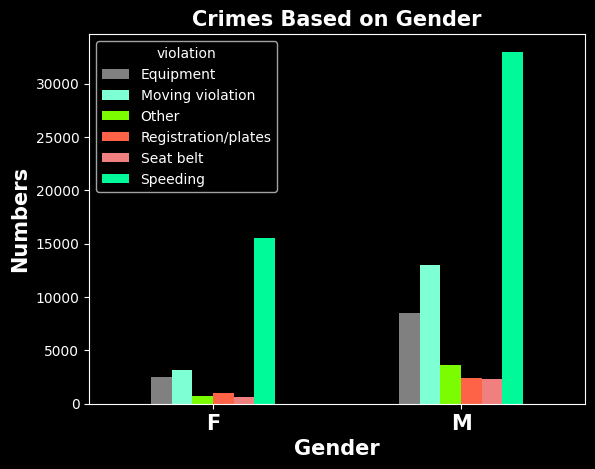

In [231]:
r.plot(kind='bar',color=["grey","aquamarine","lawngreen","tomato","lightcoral","mediumspringgreen"])

mt.title("Crimes Based on Gender",size=15,fontweight='bold')
mt.xticks(rotation=0,size=15,fontweight='bold')
mt.xlabel("Gender",size=15,fontweight='bold')
mt.ylabel('Numbers',size=15,fontweight='bold')
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Crimes Based on Gender.jpeg')

In [26]:
F_1=df.groupby(["driver_race","violation"]).stop_outcome.count().unstack()
F_1

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_race,,,,,,
Asian,201,334,77,58,58,1525
Black,2202,2871,867,783,450,5024
Hispanic,2143,2405,575,716,551,3087
Other,16,51,21,2,2,147
White,6445,10503,2664,1868,1891,38576


In [235]:
mt.style.use("default")

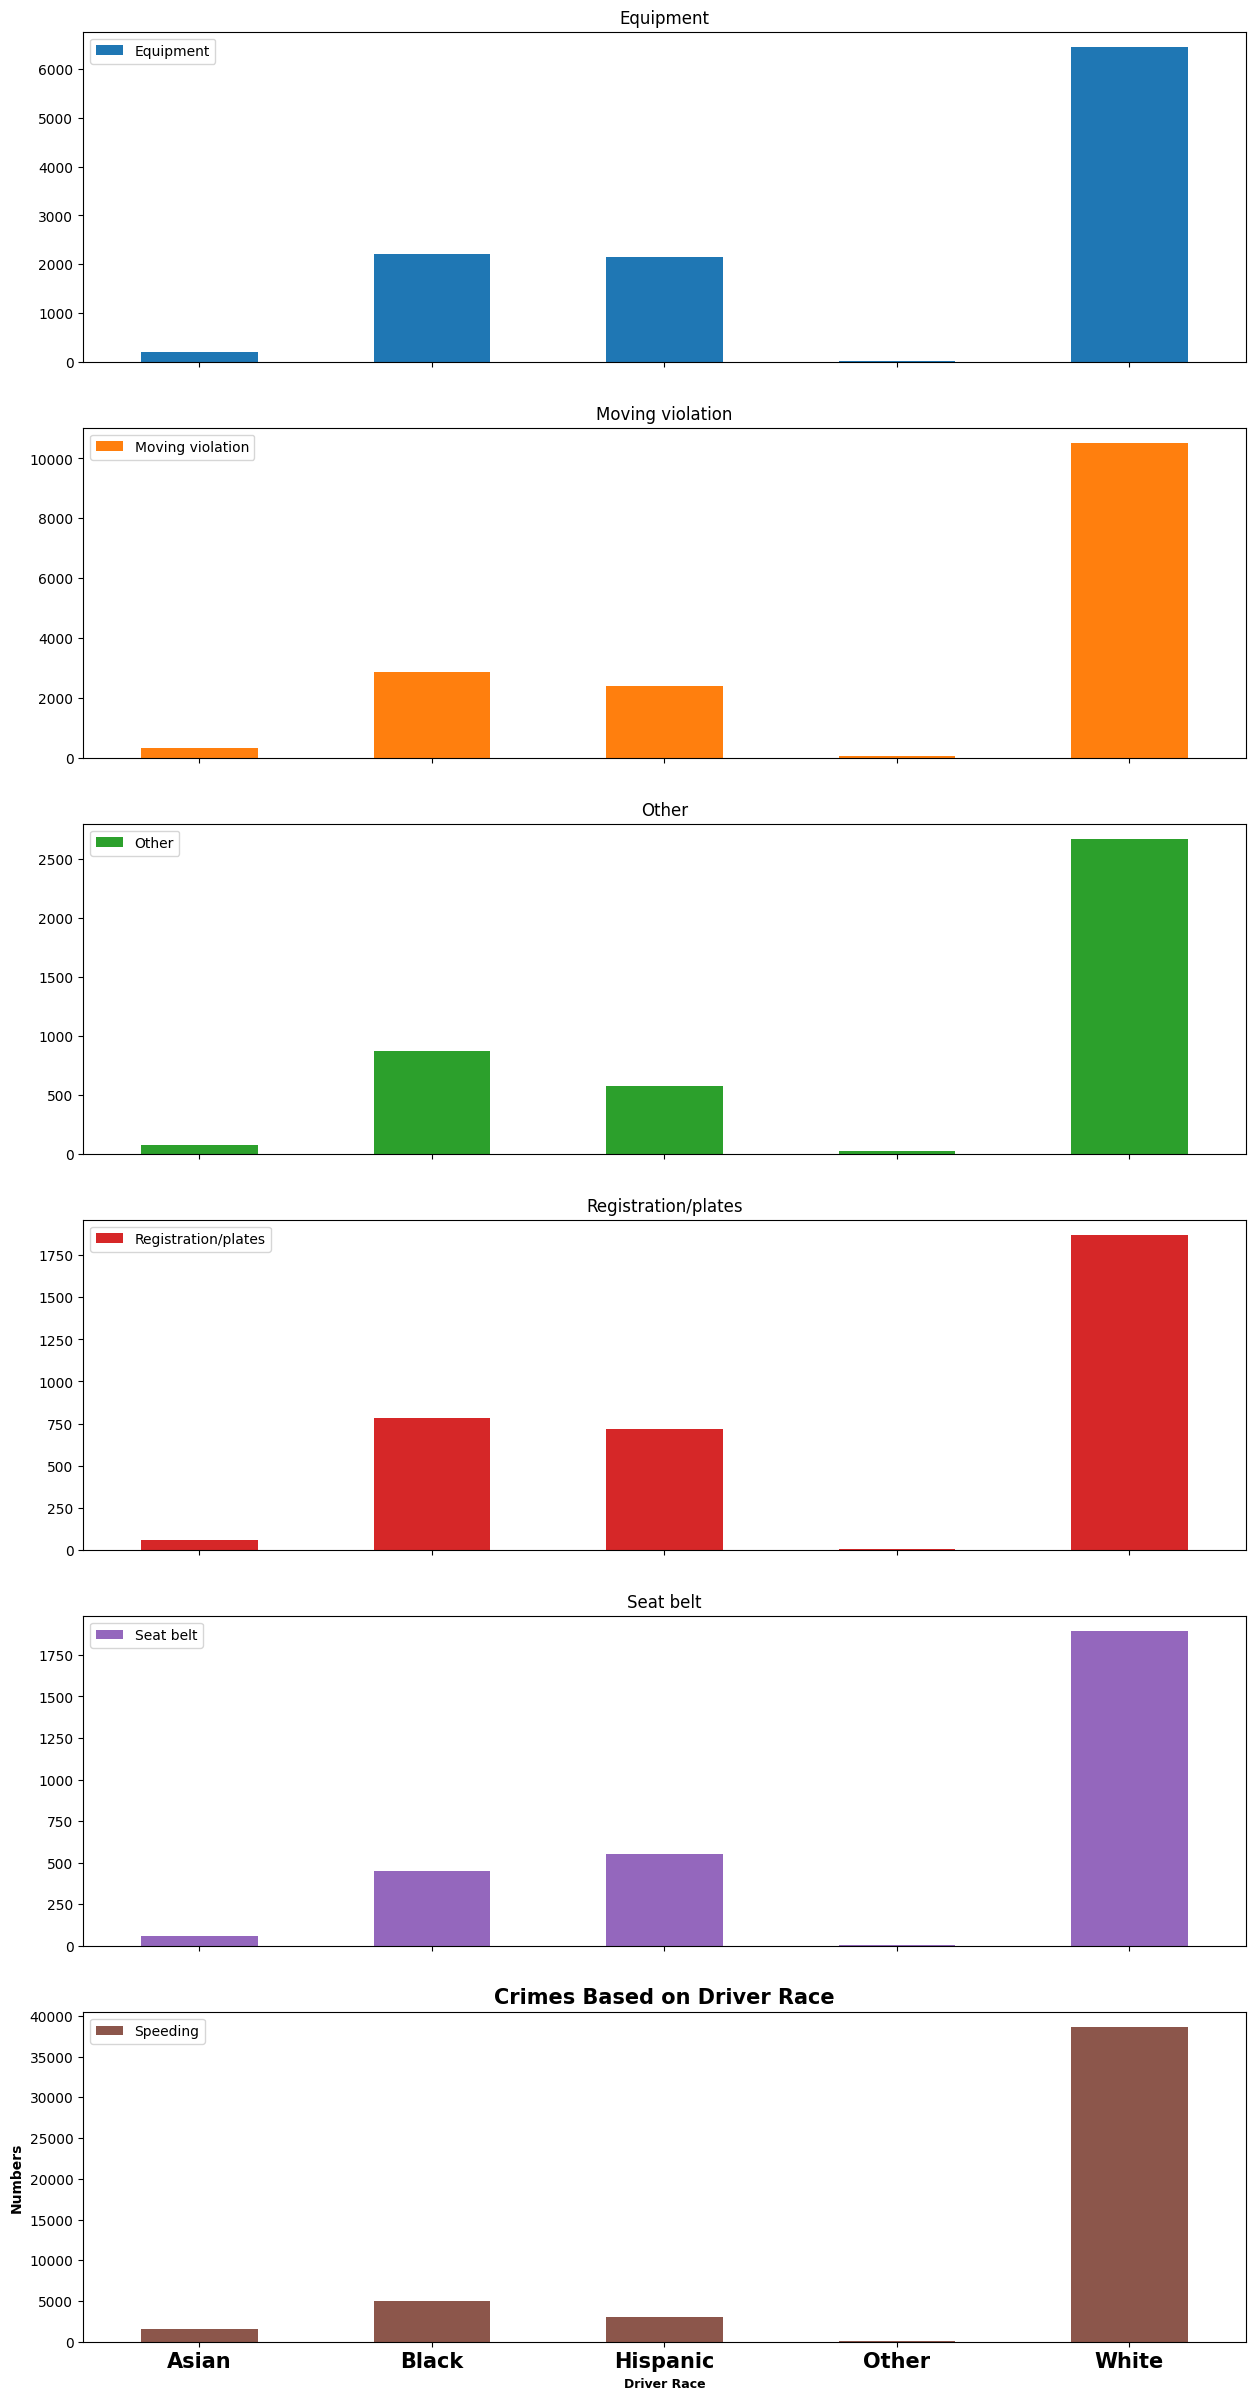

In [236]:
F_1.plot(figsize=(15,30),kind="bar",subplots=True)
mt.title("Crimes Based on Driver Race",fontweight='bold',size=15)
mt.xticks(fontweight='bold',rotation=0,size=15)
mt.xlabel("Driver Race",fontweight='bold',size=9)
mt.ylabel("Numbers",fontweight='bold',size=10)
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Crimes Based on Driver Race.jpeg')

In [36]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [37]:
drive=df.groupby(["driver_race","stop_outcome"]).stop_time.count().unstack()
drive

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
driver_race,,,,,,
Asian,36,5,2104,11,13,84
Black,599,105,10421,119,79,874
Hispanic,499,66,8053,75,92,692
Other,1,1,216,2,3,16
White,1432,181,56027,383,376,3548


In [240]:
taco=drive.loc[["Black","White"]]
taco

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
driver_race,,,,,,
Black,599,105,10421,119,79,874
White,1432,181,56027,383,376,3548


In [255]:
mt.style.use("dark_background")

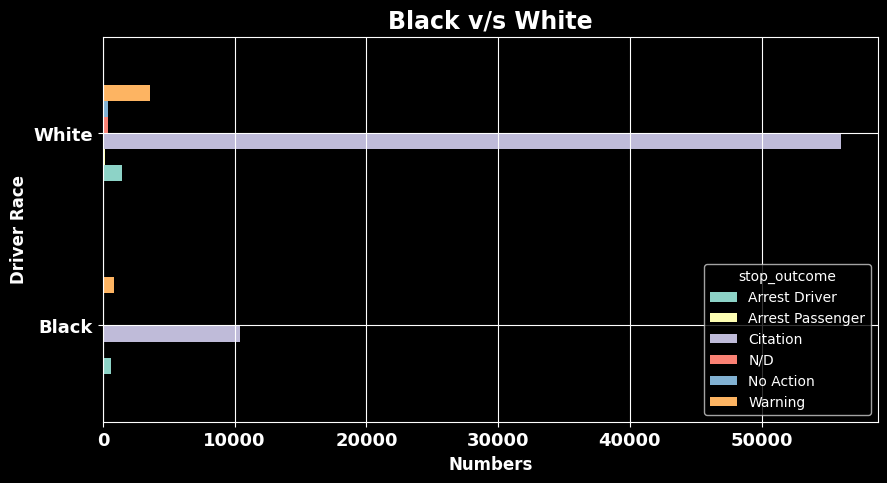

In [256]:
taco.plot(figsize=(10,5),kind='barh',linewidth=1)


mt.title("Black v/s White",fontweight='bold',size=17)
mt.xticks(rotation=0,fontweight='bold',size=13)
mt.xlabel("Numbers",fontweight='bold',size=12)
mt.yticks(fontweight='bold',size=13)
mt.ylabel("Driver Race",fontweight='bold',size=12)
mt.grid("lines")
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Black vs White.jpeg')

In [270]:
mt.style.use("default")

In [271]:
tr=df.groupby(["driver_gender",'search_conducted']).stop_time.count().unstack()
tr

search_conducted,False,True
driver_gender,,
F,23040,471
M,60170,2725


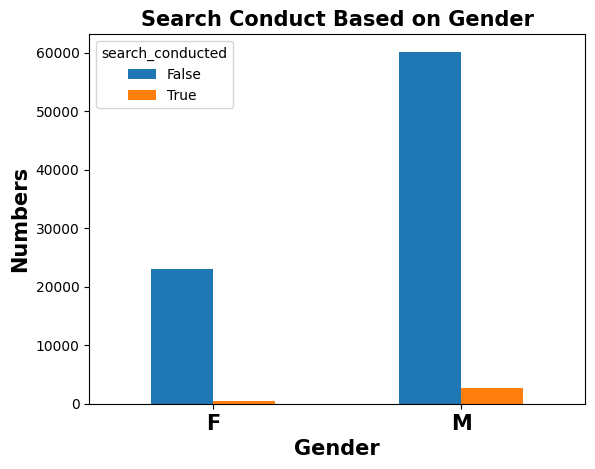

In [272]:
tr.plot(kind="bar")
mt.title("Search Conduct Based on Gender",fontweight='bold',size=15)
mt.xticks(rotation=0,fontweight='bold',size=15)
mt.xlabel("Gender",fontweight='bold',size=15)
mt.ylabel("Numbers",fontweight='bold',size=15)
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Search Conduct Based on Gender.jpeg')

In [276]:
drug=df.groupby("driver_race").drugs_related_stop.count().sort_values(ascending=False)
drug

driver_race
White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: drugs_related_stop, dtype: int64

In [280]:
dru=df.groupby(["driver_race","drugs_related_stop"]).size().unstack()
dru.style.background_gradient(cmap='berlin')

drugs_related_stop,False,True
driver_race,,
Asian,2248,11
Black,12043,201
Hispanic,9381,126
Other,239,1
White,61682,476


In [170]:
mt.style.use("default")

In [273]:
dar=df.groupby(["driver_race","is_arrested"]).stop_time.count().unstack()
dar.style.background_gradient(cmap="Set3")

is_arrested,False,True
driver_race,,
Asian,2218,41
Black,11539,705
Hispanic,8941,566
Other,238,2
White,60543,1615


In [274]:
# dar.plot(kind='barh',color=["orangered","black"])
# mt.title("Arrested Result Based on Driver Race",fontweight='bold',size=15)
# mt.xticks(fontweight='bold',size=10)
# mt.yticks(fontweight='bold',size=15)
# mt.ylabel(" ")

In [288]:
arr=df.groupby(["driver_race","violation",'is_arrested']).stop_time.size().unstack()
arr.style.background_gradient(cmap="cividis")

In [284]:
r=df.groupby('violation_raw').stop_date.count()
r

violation_raw
APB                                    79
Call for Service                     1298
Equipment/Inspection Violation      11020
Motorist Assist/Courtesy              203
Other Traffic Violation             16224
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Speeding                            48463
Suspicious Person                      56
Violation of City/Town Ordinance      211
Warrant                                15
Name: stop_date, dtype: int64

In [282]:
raw=df["violation_raw"]

In [283]:
raw=df["violation_raw"].str.split("/",expand=True).stack()
raw=raw.to_frame()
raw.columns=["violence"]
violence=raw.groupby(["violence"]).size().reset_index(name='Total Count')
violence=violence.sort_values(by=["Total Count"],ascending=False)
violence.style.background_gradient(cmap="coolwarm")

,violence,Total Count
11,Speeding,48463
7,Other Traffic Violation,16224
5,Inspection Violation,11020
4,Equipment,11020
8,Registration Violation,3432
9,Seatbelt Violation,2952
10,Special Detail,2455
3,Directed Patrol,2455
1,Call for Service,1298
13,Town Ordinance,211


In [285]:
# df.head(3).reset_index(False)

In [286]:
fr=df.groupby("driver_gender")['stop_duration'].value_counts()
fr

driver_gender  stop_duration
F              0-15 Min         19724
               16-30 Min         3390
               30+ Min            396
               1                    1
M              0-15 Min         49817
               16-30 Min        10245
               30+ Min           2832
               2                    1
Name: count, dtype: int64

In [294]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [295]:
df.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [296]:
df["stop_date"]=pd.to_datetime(df["stop_date"])
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [297]:
df.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [303]:
df["dYear"]=df.stop_date.dt.year
df.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dyear,dMonth,dYear
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005


In [304]:
df["dMonth"]=df.stop_date.dt.month
df.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dyear,dMonth,dYear
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005


In [397]:
df["MonthName"]=df.stop_date.dt.month_name()

In [305]:
df["dMonth"]

0         1
1         1
2         1
3         2
4         3
         ..
91736    12
91737    12
91738    12
91739    12
91740    12
Name: dMonth, Length: 91741, dtype: int32

In [307]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'dyear', 'dMonth',
       'dYear'],
      dtype='object')

In [388]:
year_crime=df.groupby(["violation","dMonth"]).stop_date.count().unstack()
year_crime

dMonth,1,2,3,4,5,6,7,8,9,10,11,12
violation,,,,,,,,,,,,
Equipment,1064,874,1014,940,981,942,995,918,822,785,843,842
Moving violation,1357,1302,1353,1356,1352,1304,1471,1450,1370,1364,1275,1270
Other,354,373,355,324,374,380,314,377,334,377,371,384
Registration/plates,390,335,294,262,247,275,282,286,230,292,256,283
Seat belt,182,170,253,217,330,305,297,330,318,205,189,156
Speeding,4616,3568,4040,4013,4205,3971,3729,3812,3933,4272,4492,3812


In [398]:
df.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dyear,dMonth,dYear,MonthName
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005,January
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2005,January


In [470]:
month_cr=df.groupby("MonthName")["violation"].count()
month_cr

MonthName
April        7112
August       7173
December     6747
February     6622
January      7963
July         7088
June         7177
March        7309
May          7489
November     7426
October      7295
September    7007
Name: violation, dtype: int64

In [405]:
mon_name_crime=df.groupby(["MonthName",'violation']).stop_date.count().unstack()
mon_name_crime.sort_index(ascending=False)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
MonthName,,,,,,
September,822,1370,334,230,318,3933
October,785,1364,377,292,205,4272
November,843,1275,371,256,189,4492
May,981,1352,374,247,330,4205
March,1014,1353,355,294,253,4040
June,942,1304,380,275,305,3971
July,995,1471,314,282,297,3729
January,1064,1357,354,390,182,4616
February,874,1302,373,335,170,3568


In [471]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'dyear', 'dMonth',
       'dYear', 'MonthName'],
      dtype='object')

In [490]:
no_mon_cr=df.groupby("dMonth")['violation'].count()
no_mon_cr

dMonth
1     7963
2     6622
3     7309
4     7112
5     7489
6     7177
7     7088
8     7173
9     7007
10    7295
11    7426
12    6747
Name: violation, dtype: int64

In [511]:
mt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [530]:
mt.style.use("_mpl-gallery")

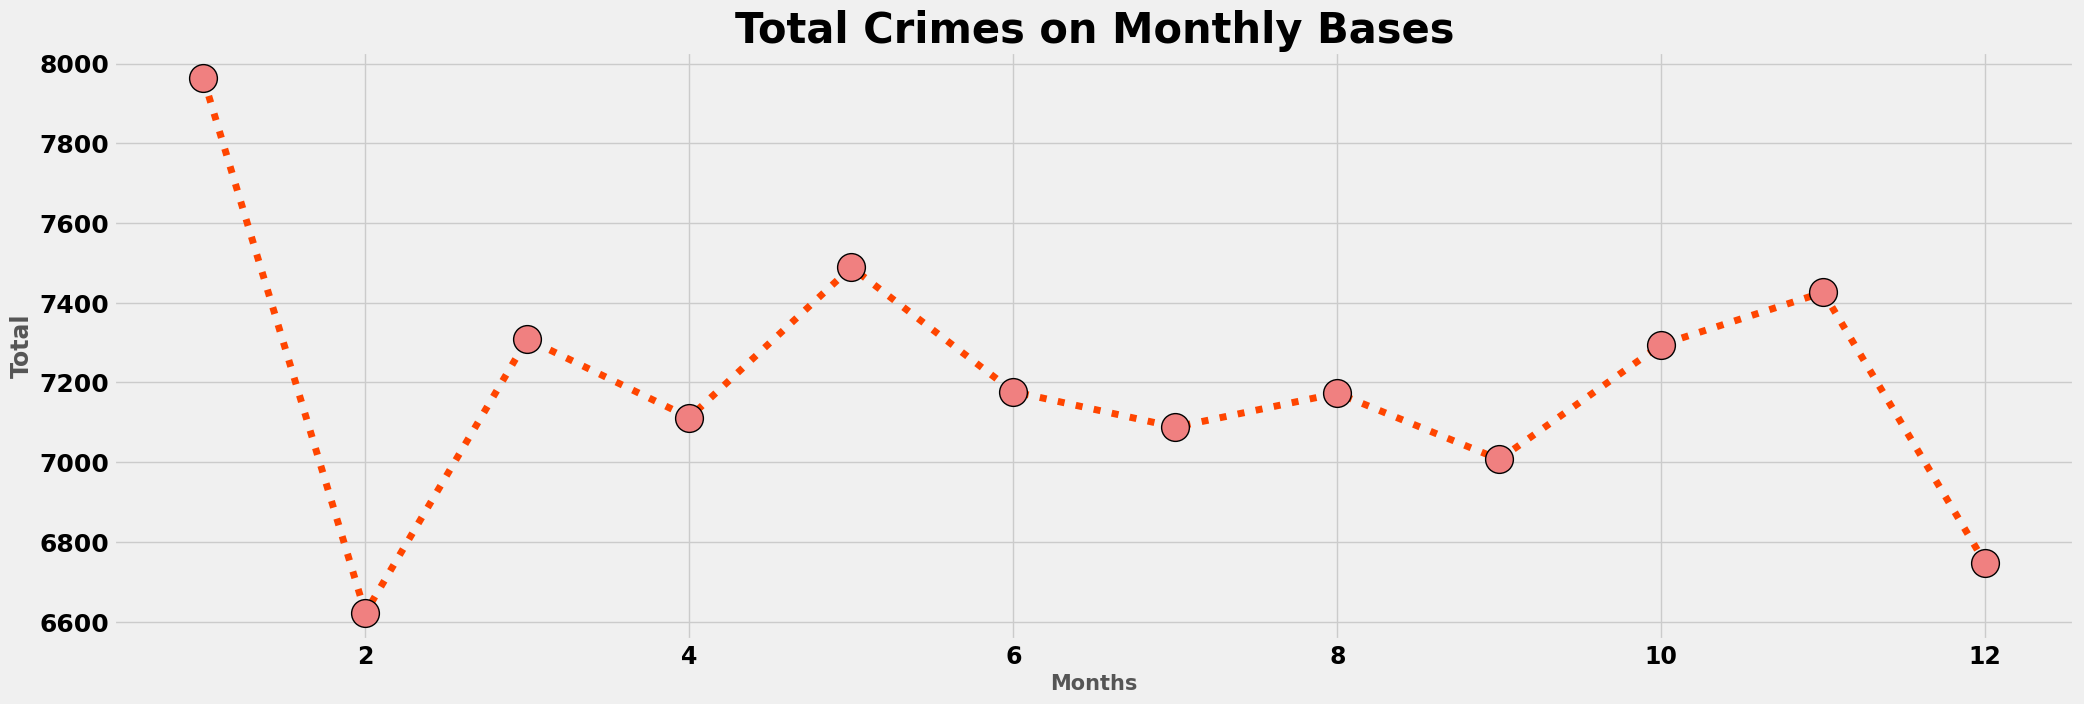

In [531]:
no_mon_cr.plot(figsize=(20,6),kind='line',
               linewidth=5,linestyle=":",
               color='orangered',marker="o",
               markersize=20,mfc='lightcoral',mec="black")

mt.title('Total Crimes on Monthly Bases',fontweight='bold',size=30)
mt.xlabel('Months',fontweight='bold',size=15)
mt.ylabel("Total",fontweight='bold',size=17)
mt.xticks(fontweight='bold',size=17,color='black')
mt.yticks(fontweight='bold',size=18,color='black')
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Total Crimes on Monthy Bases.jpeg')

In [432]:
yearly_crime=df.groupby('dYear')['violation'].count()
yearly_crime

dYear
2005     2505
2006    10142
2007     8905
2008     8151
2009     7237
2010     6995
2011     7575
2012    10396
2013     7421
2014     8849
2015     8232
Name: violation, dtype: int64

In [532]:
mt.style.use("ggplot")

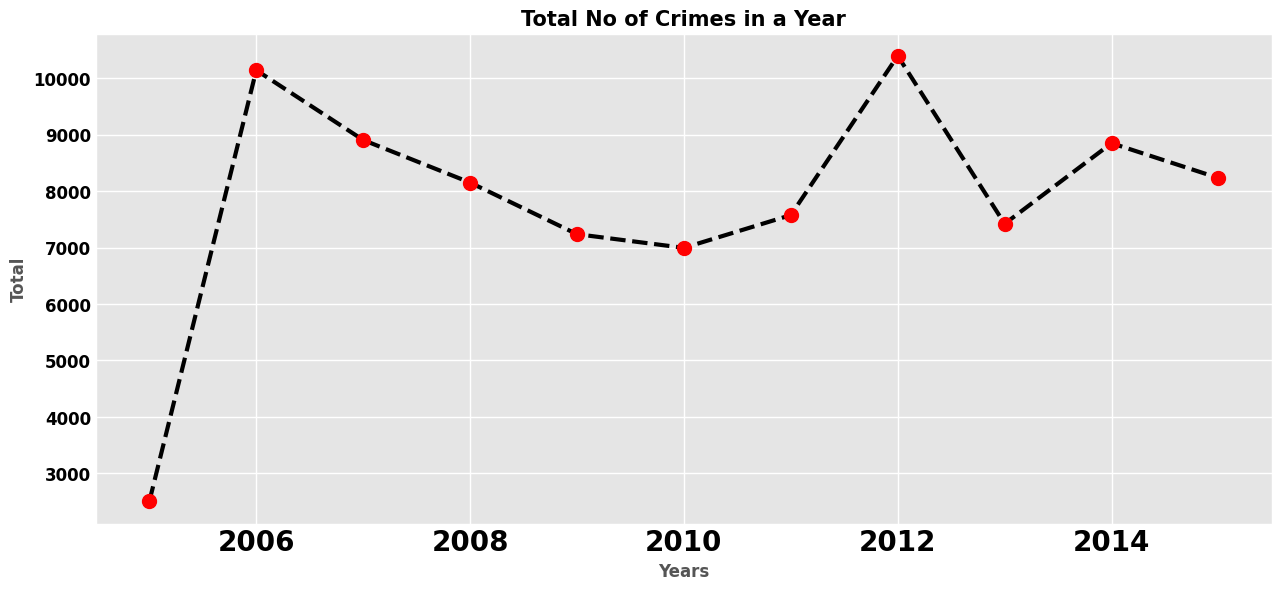

In [533]:
yearly_crime.plot(figsize=(12,5),kind='line',
                  marker=".",markersize=20,
                  mfc='red',mec='red',linewidth=3,color="black",linestyle="--")


mt.title("Total No of Crimes in a Year",fontweight='bold',size=15)
mt.xlabel("Years",fontweight='bold',size=12)
mt.ylabel("Total",fontweight='bold',size=12)
mt.xticks(fontweight='bold',size=20,color="black")
mt.yticks(fontweight='bold',size=12,color="black")
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Total No of Crimes in a Year.jpeg')

In [534]:
# moc=df.groupby("MonthName")["violation"].count()
# moc.sort_values(ascending=False)

In [517]:
# moc1=df.groupby(["dMonth","violation"]).stop_date.count().unstack()
# moc1

In [287]:
# mt.style.use("dark_background")
# violence=raw.groupby("violence").size().reset_index(name='Total Count')
# vio=violence.sort_values(by="Total Count",ascending=False)
# vio.plot(kind="barh",x='violence',
#         color="mistyrose")

# mt.title("",fontweight='bold',size=20)
# mt.ylabel(" ")

In [ ]:
# df["violation_raw"]=df["violation_raw"].str.split("/",expand=True).stack()
# df["violation_raw"]=pd.to_frame()
# df["violation"].columns=df["violation_raw"]
# df["violation"]=df["violation"].groupby(["violation"]).size().reset_index(name='Total Count')
# df["violation"]=df["violation"].sort_values(by=["Total Count"],ascending=False)
# df["violation"]

In [ ]:
# charat=fd["Characters"].str.split(",",expand=True).stack()
# charat=charat.to_frame()
# charat.columns=["Actors"]
# actors=charat.groupby(["Actors"]).size().reset_index(name="Total Count")
# actors=actors.sort_values(by=["Total Count"],ascending=False)
# actors
